In [1]:
# Importing all the required modules or packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('TCS.CSV')
df 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0
...,...,...,...,...,...,...,...
4489,2022-10-18,3150.000000,3155.350098,3128.550049,3144.699951,3144.699951,1793722.0
4490,2022-10-19,3159.000000,3159.000000,3112.000000,3121.850098,3121.850098,1194289.0
4491,2022-10-20,3105.000000,3160.000000,3105.000000,3157.300049,3157.300049,1587601.0
4492,2022-10-21,3157.800049,3160.399902,3127.000000,3137.399902,3137.399902,1021913.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4494 non-null   object 
 1   Open       4486 non-null   float64
 2   High       4486 non-null   float64
 3   Low        4486 non-null   float64
 4   Close      4486 non-null   float64
 5   Adj Close  4486 non-null   float64
 6   Volume     4486 non-null   float64
dtypes: float64(6), object(1)
memory usage: 245.9+ KB


### Filling the null values

In [4]:
df['Close'] = df['Close'].fillna(df['Close'].mean())

In [5]:
df.shape

(4494, 7)

In [6]:
# df = df.drop(['Date'],axis=1)
# df1=df.reset_index()['Close']
import datetime
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4494 non-null   datetime64[ns]
 1   Open       4486 non-null   float64       
 2   High       4486 non-null   float64       
 3   Low        4486 non-null   float64       
 4   Close      4494 non-null   float64       
 5   Adj Close  4486 non-null   float64       
 6   Volume     4486 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 245.9 KB


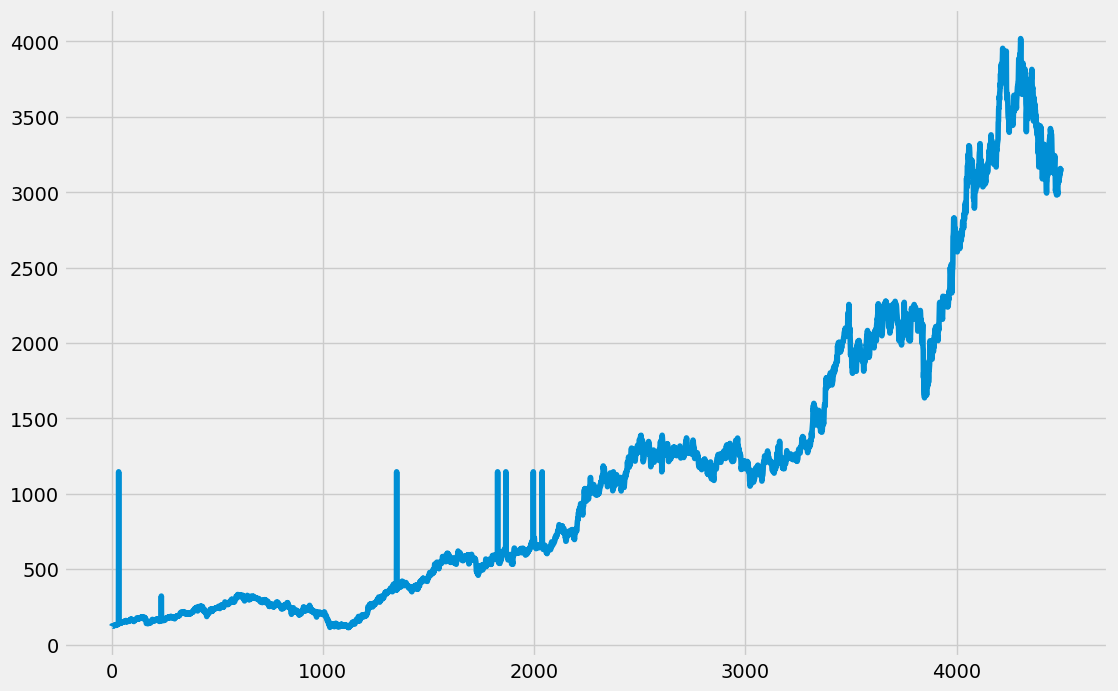

In [8]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'])
plt.show()

In [9]:
data = pd.DataFrame(df['Close'])

In [10]:
data_set = data.values

In [11]:
type(data_set)

numpy.ndarray

In [12]:
data_set

array([[ 120.332497],
       [ 123.345001],
       [ 123.512497],
       ...,
       [3157.300049],
       [3137.399902],
       [3161.699951]])

In [13]:
train_size = int(len(data_set) * 0.80)    #training_data_len
train_size

3595

In [14]:
# Scalling using MinMax Scaler
scaler = MinMaxScaler(feature_range=(0,1))
scaleddata = scaler.fit_transform(data_set)
scaleddata

array([[0.00224754],
       [0.00301848],
       [0.00306134],
       ...,
       [0.77944266],
       [0.77434998],
       [0.78056864]])

## Training Data

In [15]:
# Training Dataset
train_data = scaleddata[:train_size, :]
train_data.shape

(3595, 1)

In [16]:
# Splitting x_train and y_train
x_train = []    #independent Variable ---> contains past 100 days value
y_train = []    #dependent Variable (Target)

for i in range(100,len(train_data)):
  x_train.append(train_data[i-100:i,0])
  y_train.append(train_data[i,0])
  # if i <= 101:
  #   print(x_train)
  #   print(y_train)
  #   print()

In [17]:
# Converting the x_train from list to numpy array to train the lstm model

x_train,y_train = np.array(x_train),np.array(y_train)

In [18]:
# Converting it to 3-D dataset as per lstm requirment
x_train = np.reshape(x_train,(x_train.shape[0] ,x_train.shape[1], 1))
x_train.shape

(3495, 100, 1)

In [19]:
y_train.shape,x_train.shape

((3495,), (3495, 100, 1))

## Testing Data

In [20]:
test_data = scaleddata[train_size-100: , :]
x_test = []                           # past 100 days value
y_test = data_set[train_size:, :]     # all of the value that the model should predict {actual values 61th value}

for i in range(100,len(test_data)):
  x_test.append(test_data[i-100:i, 0])

In [21]:
# Scalling of test data
x_test = np.array(x_test)

In [22]:
# Reshape the data to 3-D for LSTM
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))

In [23]:
# LSTM Model
model = Sequential()
model.add (LSTM(50,return_sequences=True,activation='relu',input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(50))     #Connect at layer
model.add(Dense(1))  


In [24]:
model.compile(optimizer='adam',loss = 'mean_squared_error')   #loss --> how the model do at training

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 33,201
Trainable params: 33,201
Non-trainable params: 0
_________________________________________________________________


In [25]:
# model.fit(x_train,y_train,epochs=1,batch_size=1)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64)


Epoch 1/100
55/55 [==============================] - 19s 223ms/step - loss: 0.0035 - val_loss: 8220112.5000
Epoch 2/100
55/55 [==============================] - 9s 167ms/step - loss: 1.1655e-04 - val_loss: 8220206.5000
Epoch 3/100
55/55 [==============================] - 8s 151ms/step - loss: 1.0501e-04 - val_loss: 8220232.0000
Epoch 4/100
55/55 [==============================] - 8s 151ms/step - loss: 1.0282e-04 - val_loss: 8220261.5000
Epoch 5/100
55/55 [==============================] - 8s 149ms/step - loss: 1.0247e-04 - val_loss: 8220234.0000
Epoch 6/100
55/55 [==============================] - 7s 128ms/step - loss: 1.0139e-04 - val_loss: 8220325.5000
Epoch 7/100
55/55 [==============================] - 7s 133ms/step - loss: 1.0277e-04 - val_loss: 8220204.0000
Epoch 8/100
55/55 [==============================] - 7s 130ms/step - loss: 1.0074e-04 - val_loss: 8220254.0000
Epoch 9/100
55/55 [==============================] - 7s 129ms/step - loss: 9.9667e-05 - val_loss: 8220336.5000
Epoc

In [29]:
# model.save('our_model.h5')

In [26]:
pred = model.predict(x_test)                                            #it must be similar to y_test
pred = scaler.inverse_transform(pred)

29/29 [==============================] - 2s 27ms/step


In [ ]:
pred

In [28]:
# Evaluate the Model (Root Mean Squared Error) --> it measures the accuracy
rmse = np.sqrt(np.mean(pred-y_test)**2)
rmse

23.899458457687363

## Accuracy

In [34]:
errors = abs(pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Accuracy: 98.54 %.


Visualization

C:\Users\Gaurabh Chowdhury\AppData\Local\Temp\ipykernel_8792\2408688277.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = pred


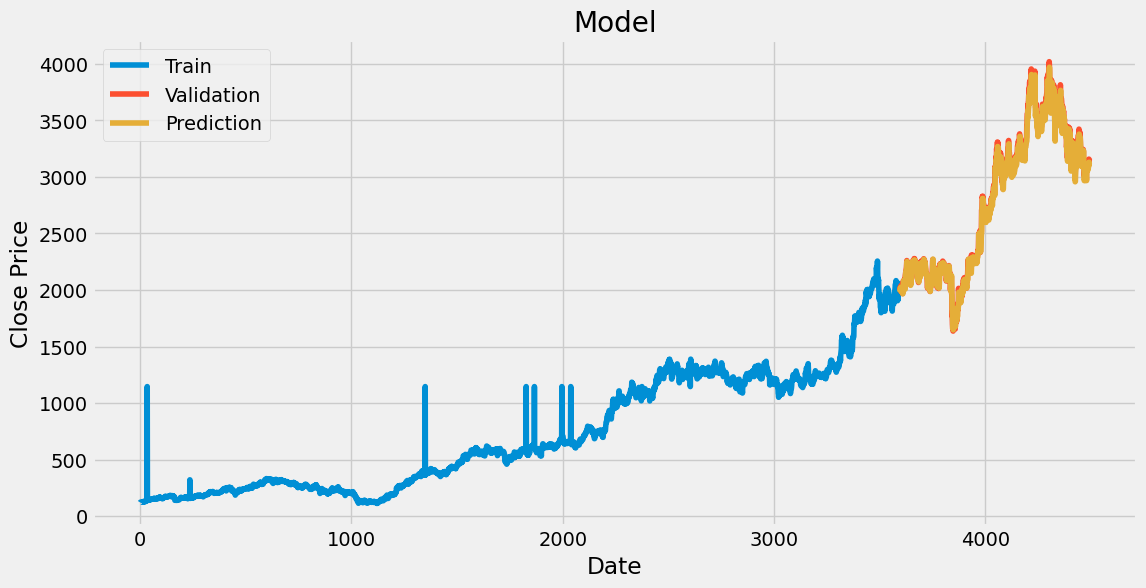

In [30]:
train = data[:train_size]
valid = data[train_size:]

valid['Prediction'] = pred

plt.figure(figsize=(12,6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Train','Validation','Prediction'],loc='upper left')
plt.show()

In [32]:
# Actual Price and Predicted Price
valid

,Close,Prediction
3595,1999.599976,1981.826172
3596,2013.300049,1989.250854
3597,2022.699951,2004.403564
3598,2014.800049,2017.566162
3599,2012.449951,2015.392334
...,...,...
4489,3144.699951,3086.799072
4490,3121.850098,3120.809326
4491,3157.300049,3102.799072
4492,3137.399902,3129.941406
